In [13]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Ukuran Gambar:{img.shape}")
  return img

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

Ukuran Gambar:(500, 500, 3)


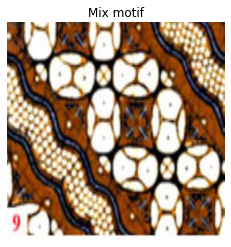

In [25]:
img = view_random_image("data_klasifikasi_batik/train/", "Mix motif")

In [2]:
tf.random.set_seed(46)

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_dir = "data_klasifikasi_batik/train/"
test_dir = "data_klasifikasi_batik/test/"

In [5]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(450,450),
                                               class_mode="categorical",
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=16,
                                               target_size=(450,450),
                                               class_mode="categorical",
                                               seed=46)

Found 580 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [6]:
model_1 = Sequential([
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(2),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(2),
                      Flatten(),
                      Dense(6, activation="softmax")
])

In [7]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [8]:
history_1 = model_1.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/10
37/37 [==============================] - 23s 609ms/step - loss: 3.0829 - accuracy: 0.3000 - val_loss: 2.3469 - val_accuracy: 0.2333
Epoch 2/10
37/37 [==============================] - 25s 679ms/step - loss: 1.4042 - accuracy: 0.4828 - val_loss: 1.7366 - val_accuracy: 0.3000
Epoch 3/10
37/37 [==============================] - 24s 635ms/step - loss: 0.9814 - accuracy: 0.6448 - val_loss: 1.9512 - val_accuracy: 0.3833
Epoch 4/10
37/37 [==============================] - 22s 589ms/step - loss: 0.6350 - accuracy: 0.8034 - val_loss: 1.9034 - val_accuracy: 0.3667
Epoch 5/10
37/37 [==============================] - 22s 601ms/step - loss: 0.4985 - accuracy: 0.8534 - val_loss: 2.4528 - val_accuracy: 0.3500
Epoch 6/10
37/37 [==============================] - 23s 606ms/step - loss: 0.4935 - accuracy: 0.8690 - val_loss: 1.7620 - val_accuracy: 0.4167
Epoch 7/10
37/37 [==============================] - 23s 624ms/step - loss: 0.4167 - accuracy: 0.8966 - val_loss: 2.3312 - val_accuracy: 0.3667

In [14]:
def plot_loss_corves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_acc')
  plt.plot(epochs, val_accuracy, label='val_acc')
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

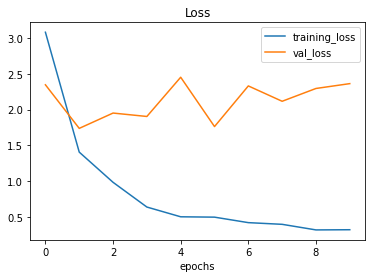

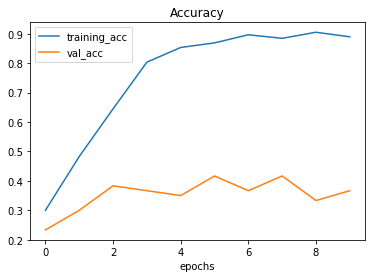

In [15]:
plot_loss_corves(history_1)

In [16]:
# augmentasi data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                                        batch_size=16,
                                                        target_size=(450,450),
                                                        class_mode="categorical",
                                                        shuffle=True)

Found 580 images belonging to 6 classes.
